# Chapter8. 신경망 · 딥러닝의 응용(필기체 숫자 인식)

## 8-1 MNIST 데이터베이스

MNIST: 필기체 숫자 데이터셋

MNIST 데이터 다운로드

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


x_train: 60000개의 28*28 크기의 이미지
y_train: 각 x_train 데이터에 대응하는 60000개의 정답 값 (0~9의 정수)

x_train의 첫 3개의 이미지를 표시

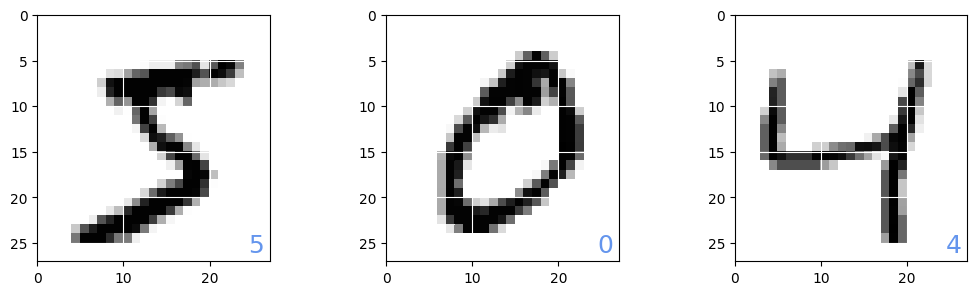

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
  plt.subplot(1, 3, id + 1)
  img = x_train[id, :, :]
  plt.pcolor(255 - img)
  plt.text(24.5, 26, y_train[id], color="cornflowerblue", fontsize=18)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.grid("on", color="white")
plt.show()

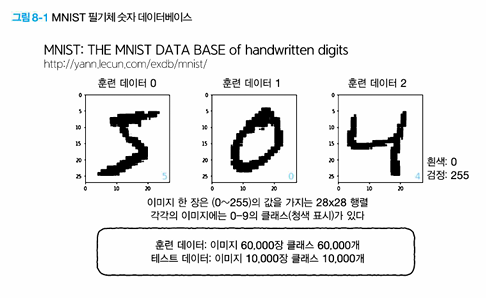

## 8-2 2층 피드 포워드 네트워크 모델

2층 피드 포워드 네트워크 모델을 사용해 이 필기체 숫자의 클래스 분류 문제가 해결되는지 살펴보기

In [3]:
from keras.utils import to_categorical

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype("float32")
x_train /= 255

num_classes = 10

y_train = to_categorical(y_train, num_classes)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype("float32")
x_test /= 255

y_test = to_categorical(y_test, num_classes)

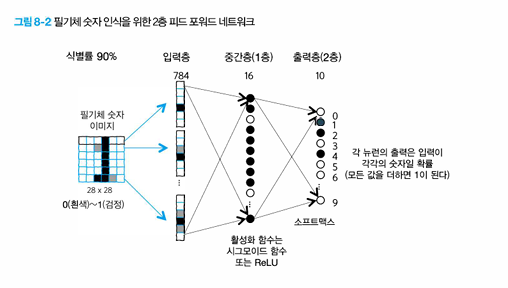

In [4]:
np.random.seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")
print(f"Computation time: {time.time() - startTime:.3f} sec")

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1420 - loss: 2.4144 - val_accuracy: 0.3407 - val_loss: 1.9711
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4015 - loss: 1.8815 - val_accuracy: 0.5998 - val_loss: 1.6271
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6422 - loss: 1.5523 - val_accuracy: 0.7481 - val_loss: 1.3426
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7560 - loss: 1.2872 - val_accuracy: 0.8045 - val_loss: 1.1306
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8125 - loss: 1.0923 - val_accuracy: 0.8380 - val_loss: 0.9714
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8389 - loss: 0.9443 - val_accuracy: 0.8600 - val_loss: 0.8481
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8554 - loss: 0.8337 - val_accuracy: 0.8728 - val_loss: 0.7500
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8711 - loss: 0.7353 - val_accuracy: 0.8809 - val_loss

기본 경사 하강법은 local minimum에 빠질 경우 빠져나갈 수 없지만 확률적 경사 하강법은 local minimum을 빠져나갈 수 있다.

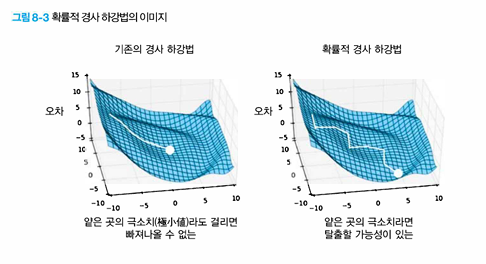

오버 피팅 여부를 판단하기 위해 validation data 사용

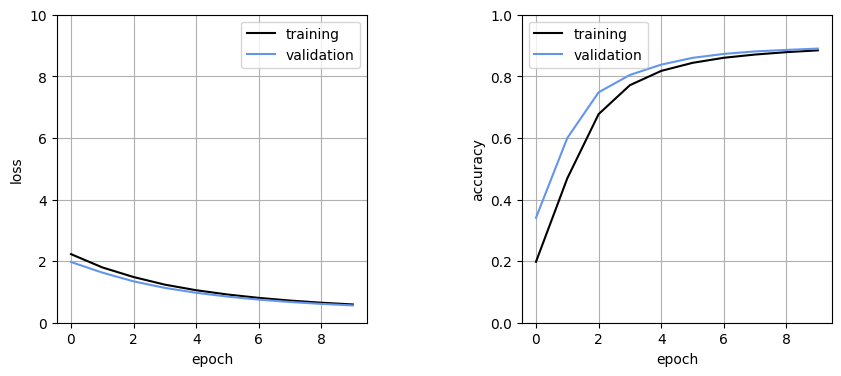

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

# Loss 확인
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="training", color="black")
plt.plot(history.history["val_loss"], label="validation", color="cornflowerblue")
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")

# Accuracy 확인
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="training", color="black")
plt.plot(history.history["val_accuracy"], label="validation", color="cornflowerblue")
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.show()

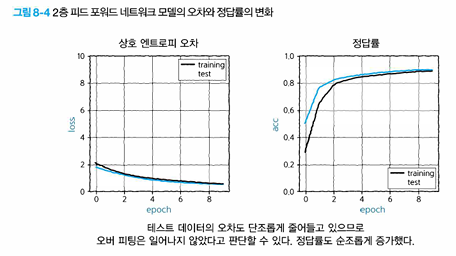

실제 test data를 사용하여 성능 확인

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


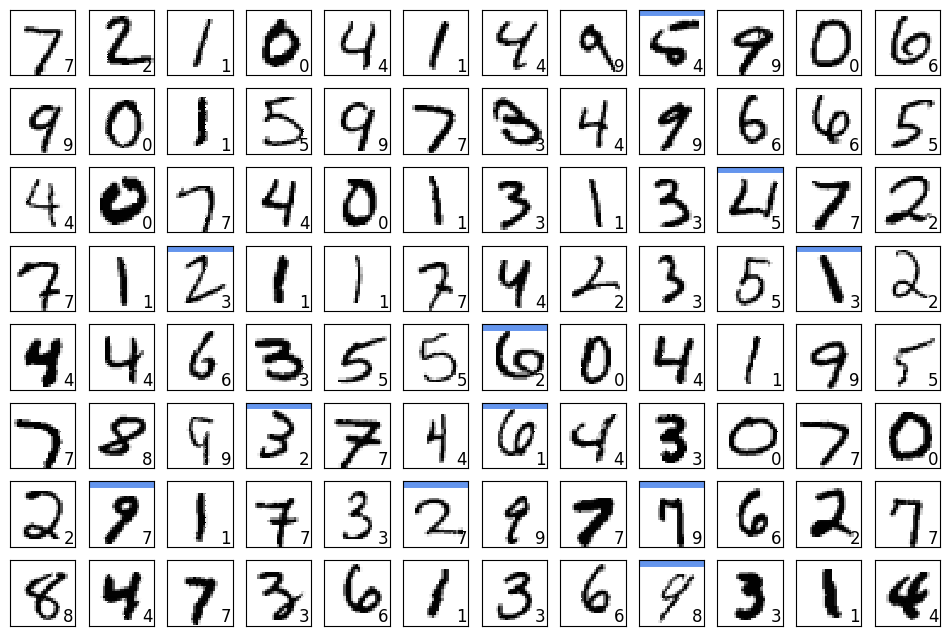

In [7]:
def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()

  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot([0, 27], [1, 1], color="cornflowerblue", linewidth=5)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")

show_prediction()
plt.show()

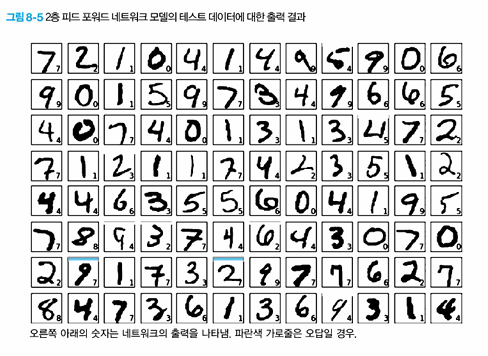

## 8-3 ReLU 활성화 함수

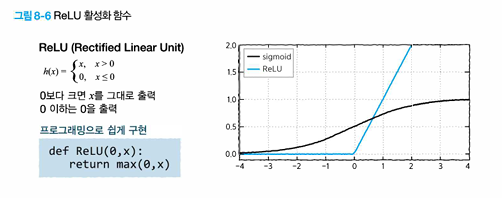

활성화 함수를 ReLU로 변경하여 실행

In [8]:
np.random.seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

# 모델 정의
model = Sequential()
model.add(Dense(16, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(
  loss="categorical_crossentropy",
  optimizer=Adam(),
  metrics=["accuracy"]
)

# 모델 학습
startTime = time.time()
history = model.fit(
  x_train,
  y_train,
  batch_size=1000,
  epochs=10,
  verbose=1,
  validation_data=(x_test, y_test)
)

# 성능 측정
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")
print(f"Computation time: {time.time() - startTime:.3f} sec")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3731 - loss: 1.8743 - val_accuracy: 0.7927 - val_loss: 0.9208
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8168 - loss: 0.7937 - val_accuracy: 0.8802 - val_loss: 0.4918
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8768 - loss: 0.4824 - val_accuracy: 0.8989 - val_loss: 0.3834
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8972 - loss: 0.3892 - val_accuracy: 0.9089 - val_loss: 0.3346
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9077 - loss: 0.3422 - val_accuracy: 0.9149 - val_loss: 0.3070
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9154 - loss: 0.3133 - val_accuracy: 0.9188 - val_loss: 0.2882
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9201 - loss: 0.2893 - val_accuracy: 0.9209 - val_loss: 0.2745
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9247 - loss: 0.2769 - val_accuracy: 0.9256 - val_loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


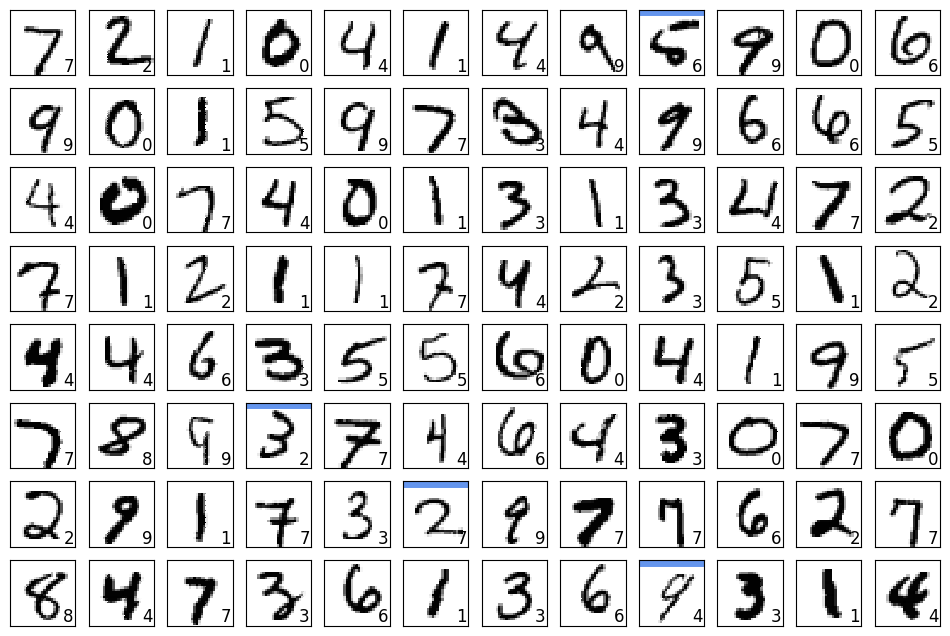

In [9]:
show_prediction()
plt.show()

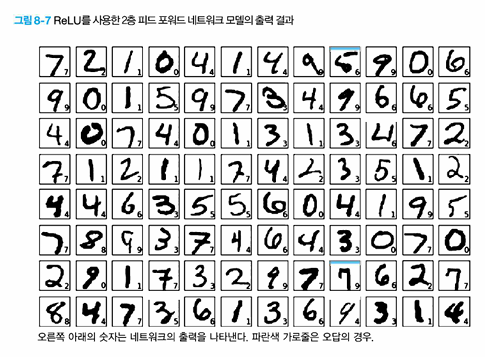

네트워크가 획득한 매개 변수를 확인 (시각화)

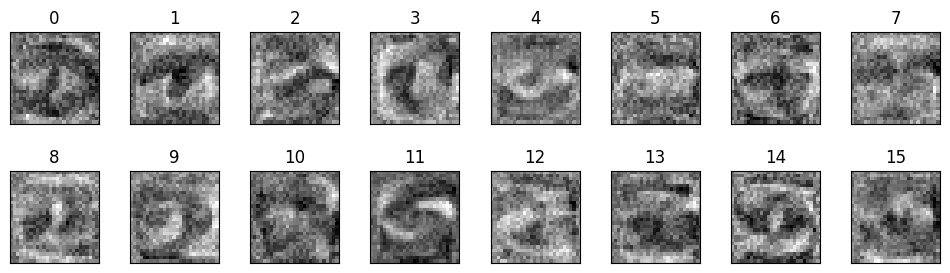

In [10]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
  plt.subplot(2, 8, i + 1)
  w1 = w[:, i]
  w1 = w1.reshape(28, 28)
  plt.pcolor(-w1)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title(i)

plt.show()

가중치 값이 양수면 검은색, 음수면 흰색으로 표시

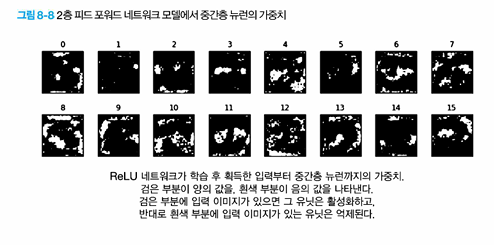

간단한 2층 피드 포워드 네트워크 모델에서도 높은 정확도를 낼 수 있다.

문제점: 2층 피드 포워드 네트워크는 공간 정보를 사용하지 않는다.

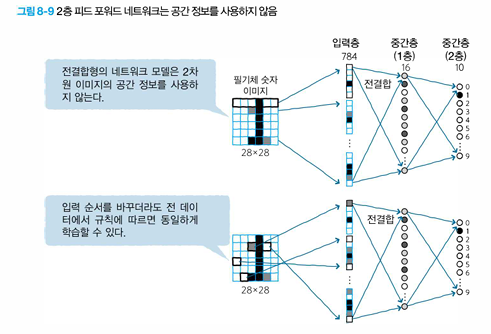

## 8-4 공간 필터

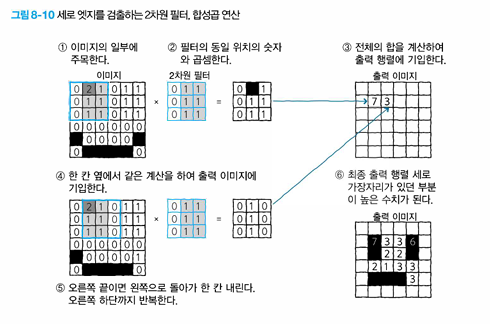

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


MNIST 데이터 불러오기

In [12]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

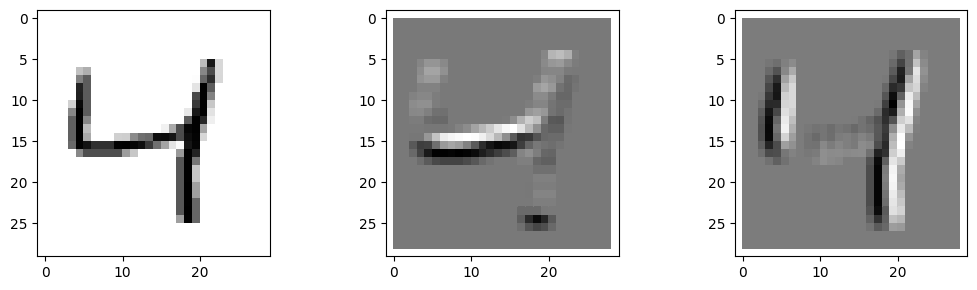

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

# 필터 정의
id_img = 2
myfil1 = np.array([[1, 1, 1], [1, 1, 1], [-2, -2, -2]], dtype=float)
myfil2 = np.array([[-2, 1, 1], [-2, 1, 1], [-2, 1, 1]], dtype=float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
  for iw in range(img_w - 3):
    img_part = x_img[ih:ih + 3, iw:iw + 3]
    out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
    out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

# 시각화
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.show()

엣지 필터의 적용 결과

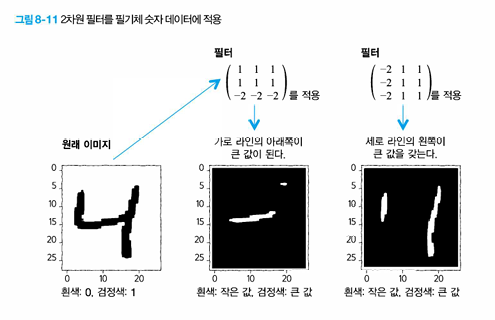

### Padding

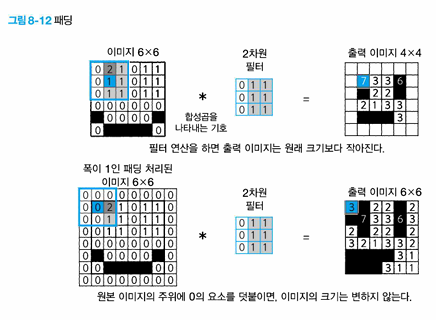

### Stride

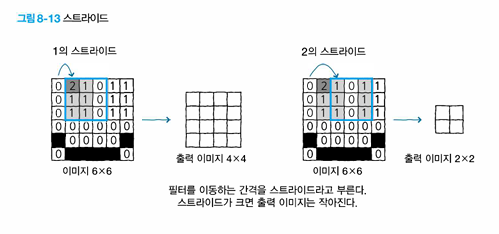

## 8-5 합성곱 신경망

CNN: Convolutional Neural Network

합성곱 신경망

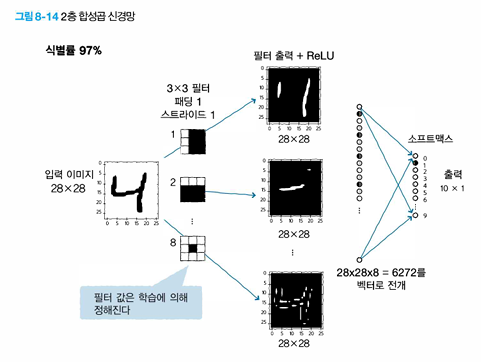

CNN 구현하기

In [14]:
import numpy as np
np.random.seed(1)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

# 모델 정의
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", input_shape=(28, 28, 1), activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(
  loss="categorical_crossentropy",
  optimizer=Adam(),
  metrics=["accuracy"]
)

# 모델 학습
startTime = time.time()
history = model.fit(
  x_train,
  y_train,
  batch_size=1000,
  epochs=20,
  verbose=1,
  validation_data=(x_test, y_test)
)

# 성능 측정
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")
print(f"Computation time: {time.time() - startTime:.3f} sec")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6725 - loss: 1.3719 - val_accuracy: 0.8994 - val_loss: 0.3590
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9018 - loss: 0.3425 - val_accuracy: 0.9198 - val_loss: 0.2804
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9220 - loss: 0.2789 - val_accuracy: 0.9339 - val_loss: 0.2362
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9363 - loss: 0.2299 - val_accuracy: 0.9435 - val_loss: 0.2041
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9439 - loss: 0.2010 - val_accuracy: 0.9493 - val_loss: 0.1795
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9521 - loss: 0.1756 - val_accuracy: 0.9570 - val_loss: 0.1550
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9584 - loss: 0.1542 - val_accuracy: 0.9621 - val_loss: 0.1380
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9640 - loss: 0.1343 - val_accuracy: 0.9661 - val_loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


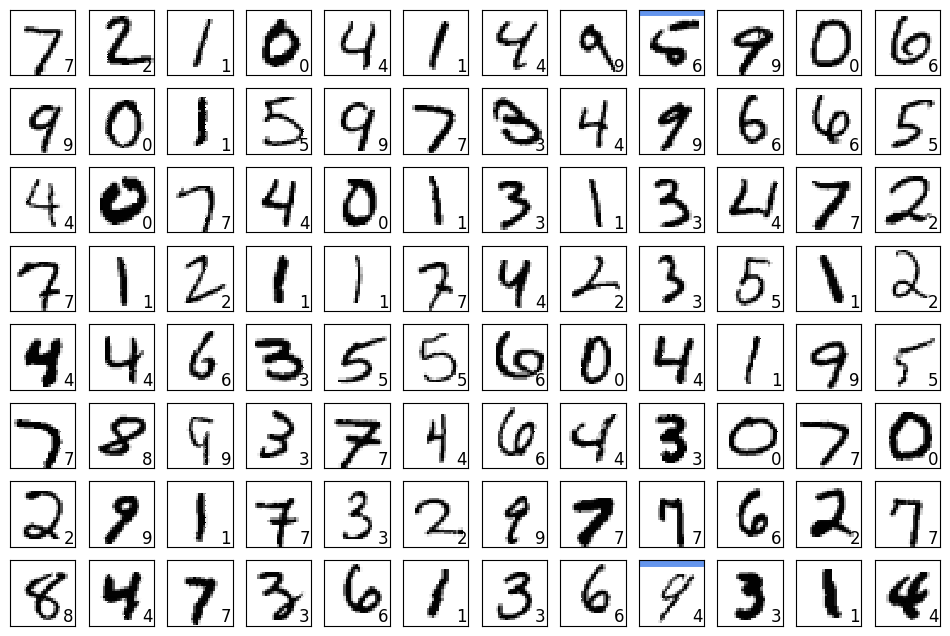

In [15]:
def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()

  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot([0, 27], [1, 1], color="cornflowerblue", linewidth=5)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")

show_prediction()
plt.show()

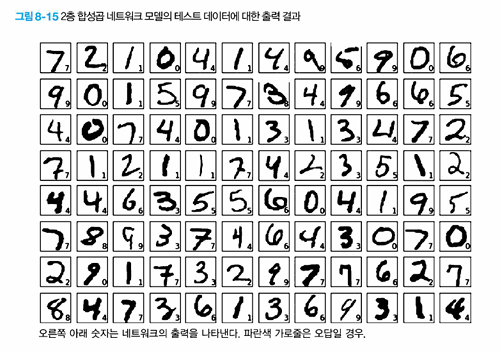

학습 이후의 필터 시각화

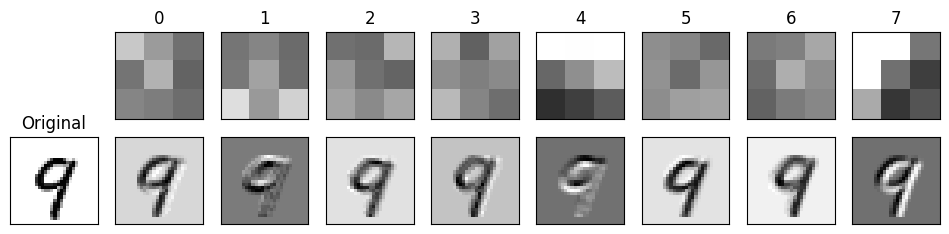

In [16]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)

id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)

plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
  plt.subplot(2, 9, i + 2)
  w1 = w[:, :, 0, i]
  w1 = w1.reshape(3, 3)
  plt.pcolor(-w1, vmin=min_w, vmax=max_w)
  plt.xlim(0, 3)
  plt.ylim(3, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title(i)
  plt.subplot(2, 9, i + 11)
  out_img = np.zeros_like(x_img)

  for ih in range(img_h - 3):
    for iw in range(img_w - 3):
      img_part = x_img[ih:ih + 3, iw:iw + 3]
      out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))

  plt.pcolor(-out_img)
  plt.xlim(0, img_w)
  plt.ylim(img_h, 0)
  plt.xticks([], "")
  plt.yticks([], "")

plt.show()

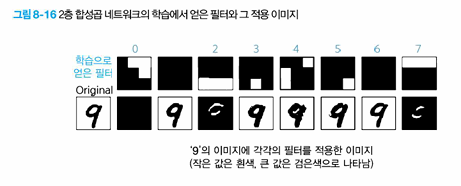

## 8-6 풀링

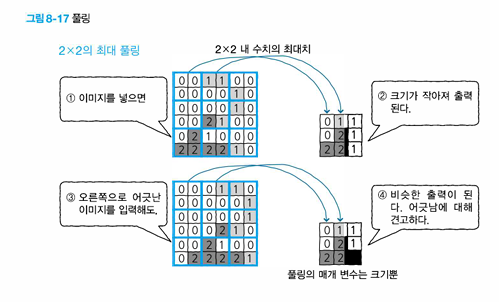

## 8-7 드롭아웃

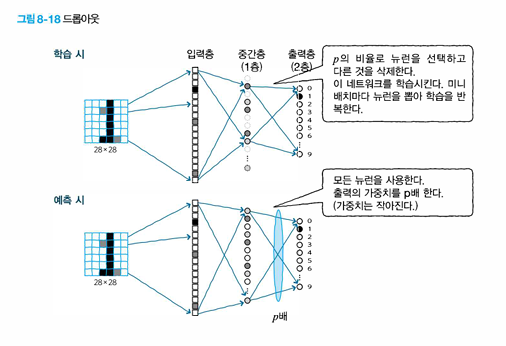

## 8-8 MNIST 인식 네트워크 모델

CNN에 풀링과 드롭아웃을 적용하여 계층의 수를 늘린 네트워크 구축

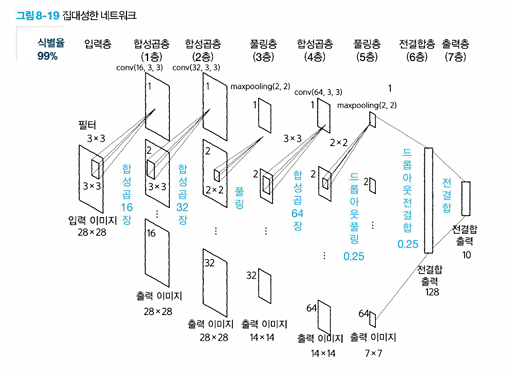

In [17]:
np.random.seed(1)
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

# 모델 정의
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation="softmax"))

model.compile(
  loss="categorical_crossentropy",
  optimizer=Adam(),
  metrics=["accuracy"]
)

# 모델 학습
startTime = time.time()
history = model.fit(
  x_train,
  y_train,
  batch_size=1000,
  epochs=20,
  verbose=1,
  validation_data=(x_test, y_test)
)

# 성능 측정
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")
print(f"Computation time: {time.time() - startTime:.3f} sec")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.5975 - loss: 1.3015 - val_accuracy: 0.9551 - val_loss: 0.1516
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9459 - loss: 0.1763 - val_accuracy: 0.9769 - val_loss: 0.0745
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9677 - loss: 0.1089 - val_accuracy: 0.9835 - val_loss: 0.0507
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9745 - loss: 0.0833 - val_accuracy: 0.9868 - val_loss: 0.0401
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9802 - loss: 0.0650 - val_accuracy: 0.9892 - val_loss: 0.0334
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9829 - loss: 0.0577 - val_accuracy: 0.9885 - val_loss: 0.0335
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9841 - loss: 0.0510 - val_accuracy: 0.9906 - val_loss: 0.0288
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9854 - loss: 0.0453 - val_accuracy: 0.9913 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


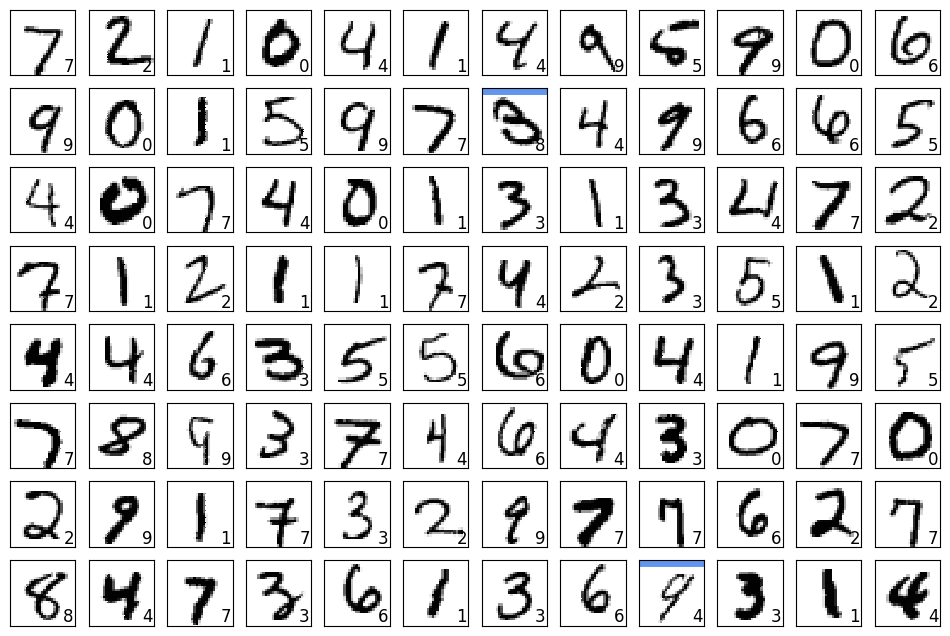

In [18]:
show_prediction()
plt.show()

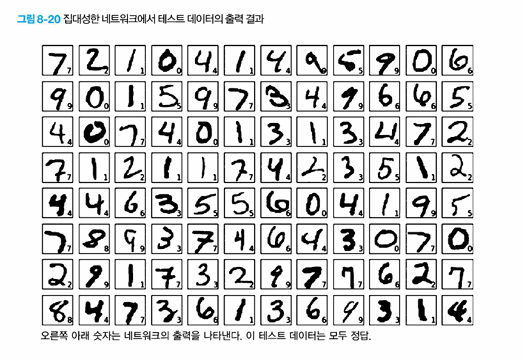